<a href="https://colab.research.google.com/github/minjung21/Final-Team9/blob/main/%EB%A9%8B%EC%82%AC_%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_20250926.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from scipy import stats
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/movies_genres_ohe.csv')

In [ ]:
import pandas as pd
from itertools import combinations

# 장르 컬럼들
non_genre_cols = [
    'id','title','vote_average','vote_count','status','release_date',
    'revenue','runtime','adult','budget','popularity','keywords','y_result'
]
genre_cols = [c for c in df.columns if c not in non_genre_cols]

# 장르 컬럼을 전부 0/1 정수로 변환
for col in genre_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() in ['1','true','yes'] else 0).astype(int)

# 장르 조합 컬럼 생성
from itertools import combinations

for genre1, genre2 in combinations(genre_cols, 2):
    combo_name = f"{genre1}_{genre2}"
    df[combo_name] = df[genre1] * df[genre2]

# 각 조합별 y_result 평균 계산
results = []
for genre1, genre2 in combinations(genre_cols, 2):
    combo_name = f"{genre1}_{genre2}"
    subset = df[df[combo_name] == 1]
    if len(subset) > 0:
        avg_y = subset['y_result'].mean()
        results.append({
            'Combination': combo_name,
            'NumMovies': len(subset),
            'Avg_y_result': avg_y
        })

combo_df = pd.DataFrame(results).sort_values('Avg_y_result', ascending=False)
print(combo_df.head(20))

                   Combination  NumMovies  Avg_y_result
22          Action_Documentary          2      2.500000
86               Crime_Fantasy         12      1.916667
98          Documentary_Family          4      1.750000
100          Documentary_Music         12      1.750000
54             Animation_Crime          6      1.666667
53            Animation_Comedy        253      1.644269
159              Music_Western          5      1.600000
57            Animation_Family        374      1.569519
120             Family_Romance         83      1.566265
71               Comedy_Family        516      1.560078
36         Adventure_Animation        265      1.550943
58           Animation_Fantasy        165      1.515152
69          Comedy_Documentary         14      1.500000
178                War_Western          2      1.500000
48   Adventure_Science Fiction        347      1.469741
19            Action_Animation         71      1.464789
2                 SR_Animation         29      1

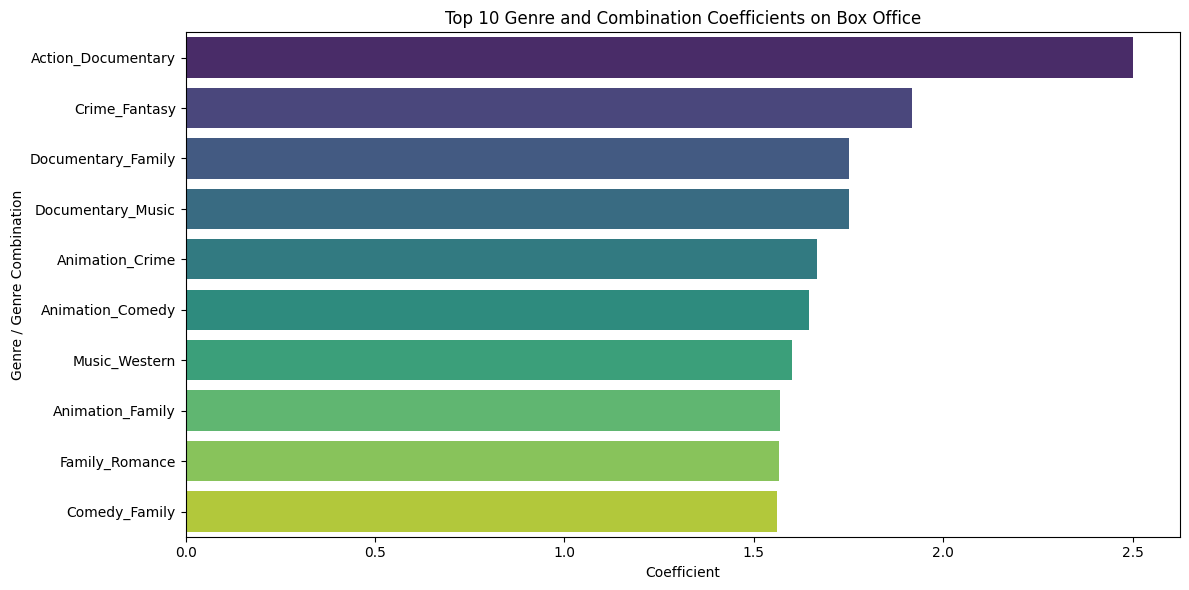

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# combo_df가 이미 있다고 가정
# 평균 높은 순으로 상위 10개만 선택
top10 = combo_df.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Avg_y_result', y='Combination', data=top10, palette='viridis')

# plt.xlabel('평균 y_result (흥행 점수)')
# plt.ylabel('장르 조합')
# plt.title('장르+장르 조합별 평균 흥행 점수 상위 10개')
# plt.tight_layout()
# plt.show()


plt.title('Top 10 Genre and Combination Coefficients on Box Office')
plt.xlabel('Coefficient')
plt.ylabel('Genre / Genre Combination')
plt.tight_layout()
plt.show()

In [ ]:
# 상위 20개 조합 이름 가져오기
top20_combos = combo_df.head(20)['Combination']

# 각 조합별 영화 리스트 뽑아서 dict로 저장
top20_movies = {}

for combo_name in top20_combos:
    subset = df[df[combo_name] == 1][['id', 'title', 'y_result']]
    top20_movies[combo_name] = subset  # DataFrame으로 저장

# 예: 특정 조합 영화 확인
print(top20_movies[top20_combos.iloc[0]].head())

# 만약 상위 20개 조합의 영화들을 하나로 합쳐서 보고 싶다면:
all_top20_movies = pd.concat(
    [df[df[c] == 1][['id', 'title', 'y_result']].assign(Combination=c)
     for c in top20_combos]
)
print(all_top20_movies)


         id               title  y_result
2877  16290          Jackass 3D         3
3233  12094  Jackass Number Two         2
           id                         title  y_result         Combination
2877    16290                    Jackass 3D         3  Action_Documentary
3233    12094            Jackass Number Two         2  Action_Documentary
93        497                The Green Mile         3       Crime_Fantasy
311       854                      The Mask         3       Crime_Fantasy
482       268                        Batman         3       Crime_Fantasy
...       ...                           ...       ...                 ...
7886   893723  PAW Patrol: The Mighty Movie         1       Action_Family
7990   173931      Legend of Kung Fu Rabbit         0       Action_Family
8151   503928                    Mahabharat         0       Action_Family
8215  1357566            Codename Hanuman X         0       Action_Family
8218   494971                    Ang Panday         1       

In [ ]:
# 애니메이션+코메디 조합 영화 리스트
animation_comedy_movies = df[df['Animation_Family'] == 1][['id', 'title', 'y_result']]

print(animation_comedy_movies)


          id                                              title  y_result
43    150540                                         Inside Out         3
51     14160                                                 Up         3
61        12                                       Finding Nemo         3
66    354912                                               Coco         3
69     10681                                             WALL·E         2
...      ...                                                ...       ...
8114  429458                        In the Forest of Huckybucky         1
8151  503928                                         Mahabharat         0
8154   47649                                  My Friend Bernard         0
8190  332511  Secret of the Sukharev Tower. Magician of Balance         2
8221  557499                                          Kung Food         0

[374 rows x 3 columns]
